In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##Load the data application record and credit record 

In [2]:
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

Data exploration

In [5]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
application.shape

(438557, 18)

In [8]:
credit.shape

(1048575, 3)

In [9]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [10]:
credit.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [11]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [13]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [14]:
application.duplicated().sum()

0

In [16]:
application['OCCUPATION_TYPE']

0                    NaN
1                    NaN
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552               NaN
438553          Laborers
438554       Sales staff
438555               NaN
438556       Sales staff
Name: OCCUPATION_TYPE, Length: 438557, dtype: object

In [15]:
application['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64

In [17]:
# filling missing values
application['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [18]:
print (len(set(application['ID']))) # how many unique ID in application record?
print (len(set(credit['ID'])) )# how many unique ID in credit record?
print (len(set(application['ID']).intersection(set(credit['ID'])))) # how many IDs do two tables share?

438510
45985
36457


ID: An identifier for each individual, typically a unique number assigned to each record.

CODE_GENDER: Gender of the individual (e.g., "M" for male, "F" for female).

FLAG_OWN_CAR: Indicates whether the individual owns a car (1 for yes, 0 for no).

FLAG_OWN_REALTY: Indicates whether the individual owns real estate/property (1 for yes, 0 for no).

CNT_CHILDREN: The count of children the individual has.

AMT_INCOME_TOTAL: The total annual income of the individual.

NAME_INCOME_TYPE: The type of income the individual receives (e.g., salary, business, maternity leave).

NAME_EDUCATION_TYPE: The highest level of education attained by the individual.

NAME_FAMILY_STATUS: The family status of the individual (e.g., married, single).

NAME_HOUSING_TYPE: The type of housing the individual lives in (e.g., own apartment, for free).

DAYS_BIRTH: The age of the individual in days (negative values representing days in the past).

DAYS_EMPLOYED: The number of days the individual has been employed (negative values representing days in the past). This might be unusual because employment duration is typically positive, so you may need to investigate the dataset or consider the sign convention used.

FLAG_MOBIL: Indicates whether the individual has a mobile phone (1 for yes, 0 for no).

FLAG_WORK_PHONE: Indicates whether the individual has a work phone (1 for yes, 0 for no).

FLAG_PHONE: Indicates whether the individual has a phone (1 for yes, 0 for no).

FLAG_EMAIL: Indicates whether the individual has an email (1 for yes, 0 for no).

OCCUPATION_TYPE: The type of occupation the individual is engaged in.

CNT_FAM_MEMBERS: The count of family members.

Understand dataset (credit)
ID: An identifier for each individual, likely a unique number assigned to each record.

MONTHS_BALANCE: This column probably represents the month of the record in relation to some reference point. It could be a relative month, indicating the number of months before or after a specific event or time. Positive values may represent months after a reference point, while negative values may represent months before.

STATUS: This column likely contains information about the credit status of the individual for a particular month. The "STATUS" column might include different codes or labels indicating the credit performance or behavior of the individual in that specific month. For example, it could include values like "C" for closed, "D" for overdue, "0" for no DPD (Days Past Due), etc. The exact codes used would depend on the data provider or the system used to record credit status

Data Visualiztion 

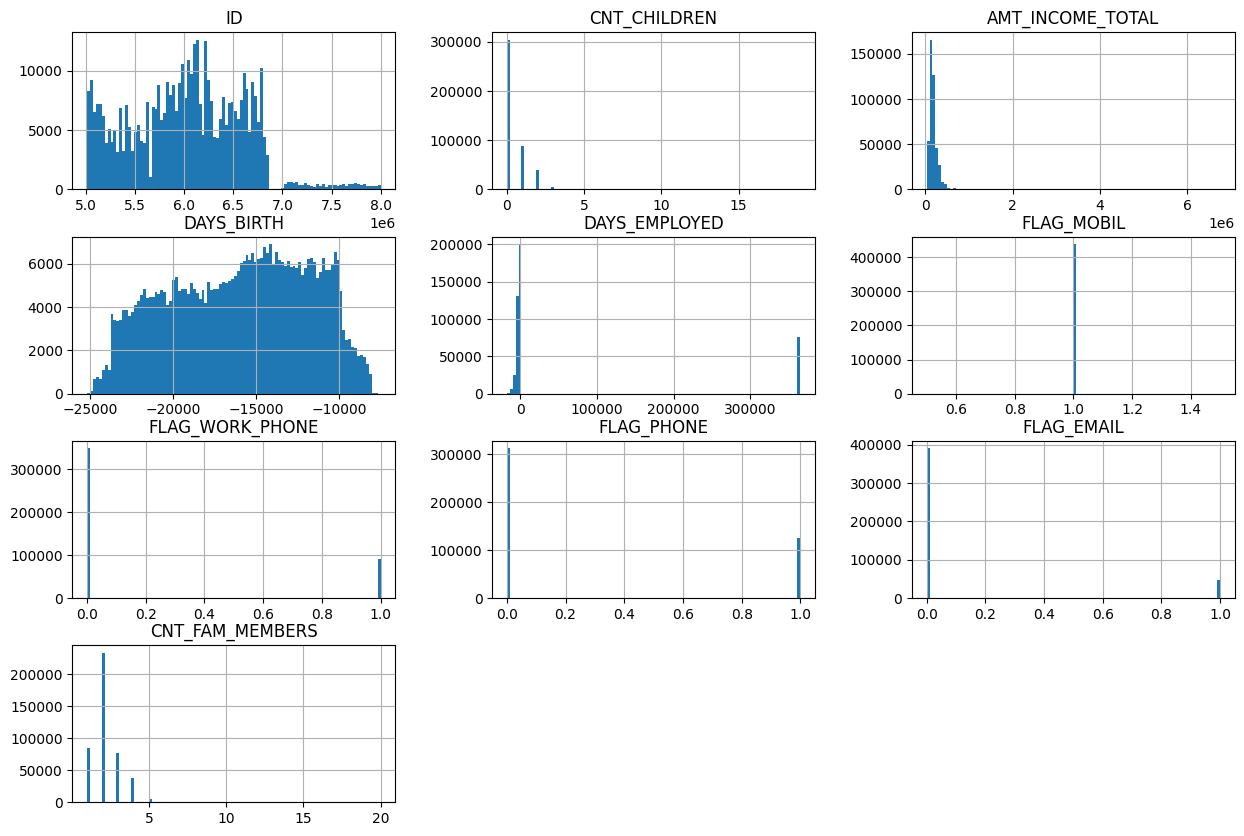

In [19]:
application.hist(bins=100,figsize=(15,10))
plt.show()

In [20]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

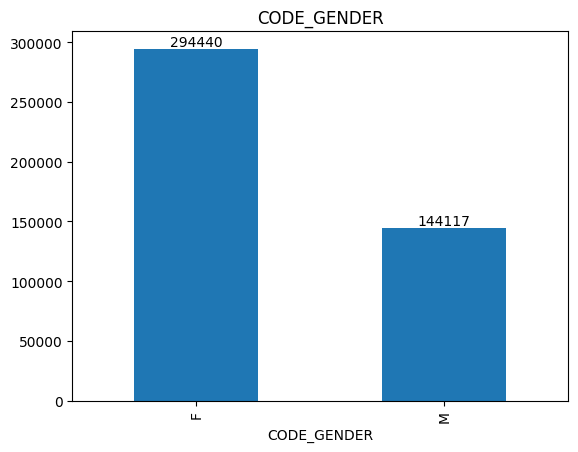

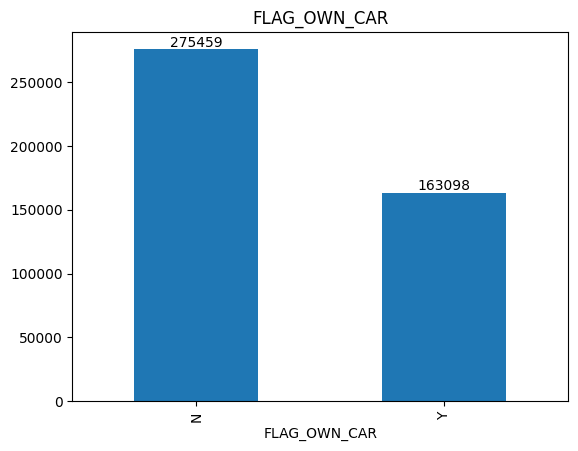

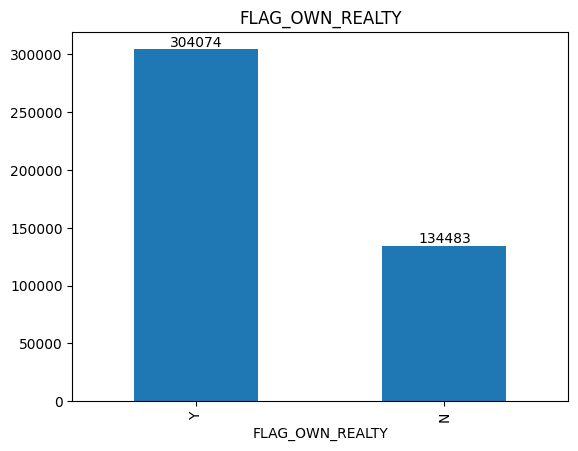

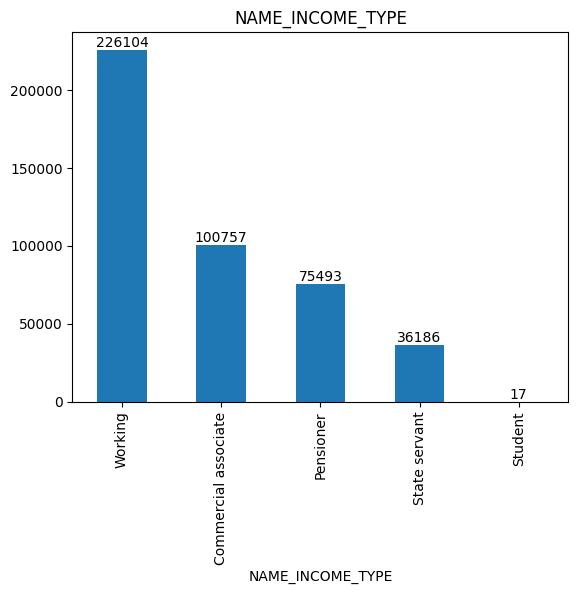

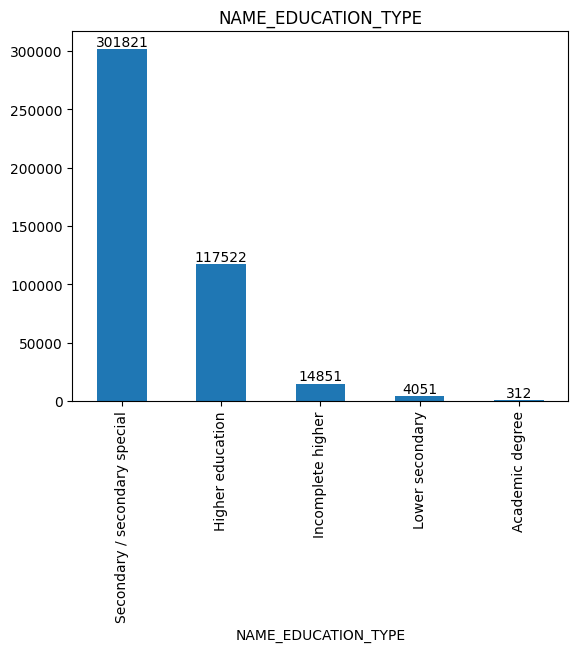

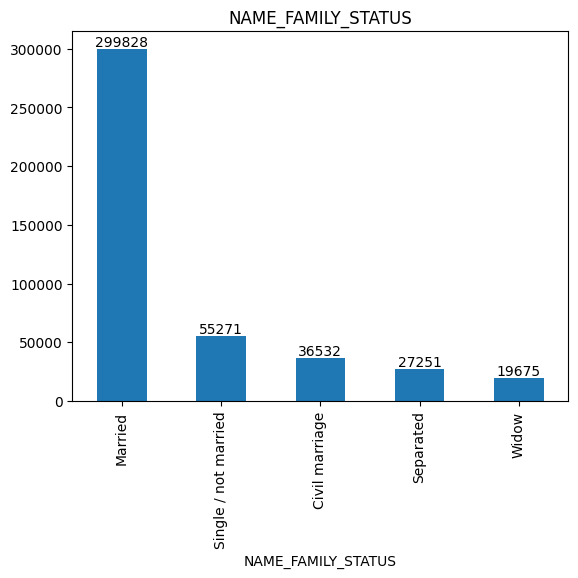

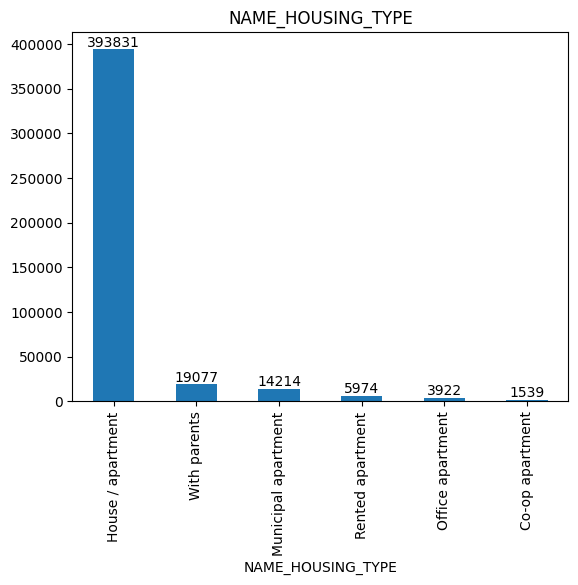

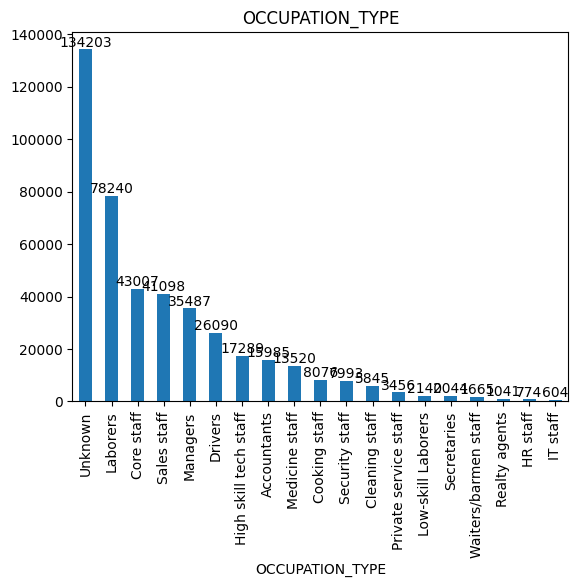

In [21]:
# display all columns have a datatype "object"
import pandas as pd
import matplotlib.pyplot as plt

def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(application)

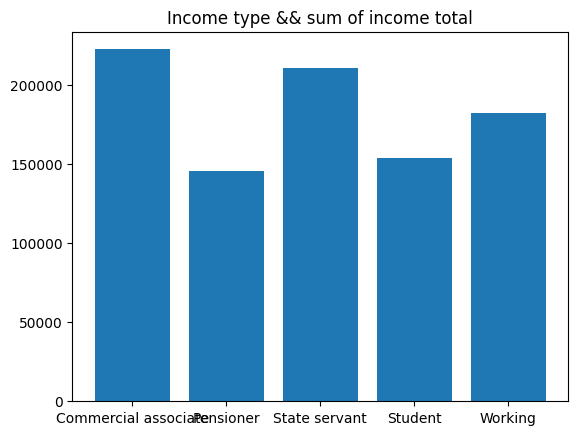

In [22]:
# pd.pivot_table(application,index='NAME_INCOME_TYPE', values ='AMT_INCOME_TOTAL')
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334,145276,210195,153692,182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()

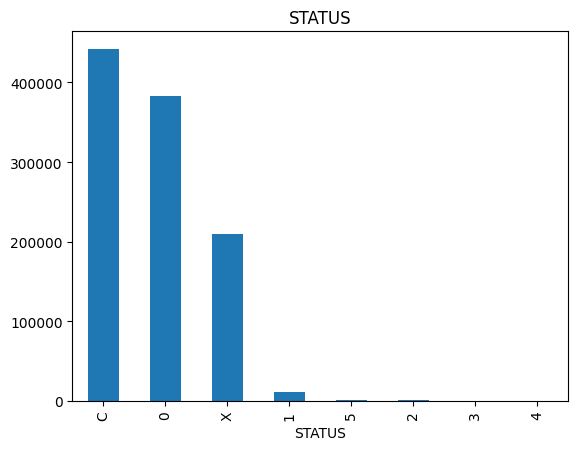

In [23]:
credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

In [24]:
grouped = credit.groupby('ID')

In [25]:
## convert credit data to wide format which every ID is a row
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

In [26]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [27]:
# Convert 'MONTHS_BALANCE' to numeric type
credit['MONTHS_BALANCE'] = pd.to_numeric(credit['MONTHS_BALANCE'], errors='coerce')

# Calculate 'open_month' using the minimum value of 'MONTHS_BALANCE'
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

In [28]:
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()  # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index

In [29]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

In [30]:
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
ID,,,
5001711,5001711,-3,0
5001712,5001712,-18,0
5001713,5001713,-21,0
5001714,5001714,-14,0
5001715,5001715,-59,0


In [31]:
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window

In [32]:
pivot_tb.reset_index(drop = True, inplace = True)

In [33]:
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left') # join calculated information

In [34]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


In [35]:
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit0 = credit.copy()
credit0.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [36]:
# count how many users in every m0onth the account was opened
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']})
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
print(denominator)


    open_month  sta_sum
0          -60      415
1          -59      406
2          -58      440
3          -57      400
4          -56      470
..         ...      ...
56          -4      874
57          -3      919
58          -2      771
59          -1      686
60           0      370

[61 rows x 2 columns]


In [37]:
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['application_status']==1,]
not_trunc = credit.loc[credit['application_status']==0,]
print (credit)

              ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
3        5001711              -3      0          -3          0       3   
2        5001711              -2      0          -3          0       3   
1        5001711              -1      0          -3          0       3   
0        5001711               0      X          -3          0       3   
22       5001712             -18      0         -18          0      18   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  application_status  
3             0              0                   0  
2    

In [38]:
import pandas as pd

# Assuming not_trunc and truncate are your DataFrames
dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

# Concatenate dt1 and dt2 vertically
dt = pd.concat([dt1, dt2], ignore_index=True)

print(dt)

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5149834              8                   1
45981  5149838              8                   1
45982  5150049              9                   1
45983  5150238             48                   1
45984  5150337              3                   1

[45985 rows x 3 columns]


In [39]:
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)
pd.options.display.max_rows = 999
print(dt)

            ID  month_on_book  application_status CODE_GENDER FLAG_OWN_CAR  \
0      5001711              3                   0     unknown      unknown   
1      5001712             18                   0     unknown      unknown   
2      5001713             21                   0     unknown      unknown   
3      5001714             14                   0     unknown      unknown   
4      5001715             59                   0     unknown      unknown   
...        ...            ...                 ...         ...          ...   
45980  5149834              8                   1           F            N   
45981  5149838              8                   1           F            N   
45982  5150049              9                   1           F            N   
45983  5150238             48                   1           F            Y   
45984  5150337              3                   1           M            N   

      FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL      NAME_I

C:\Users\farag\AppData\Local\Temp\ipykernel_5012\1440047925.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dt.fillna('unknown',inplace=True)


In [40]:
dt.to_csv(r'result2.csv')

In [41]:
dt.columns

Index(['ID', 'month_on_book', 'application_status', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'month_on_book'}>],
       [<Axes: title={'center': 'application_status'}>, <Axes: >]],
      dtype=object)

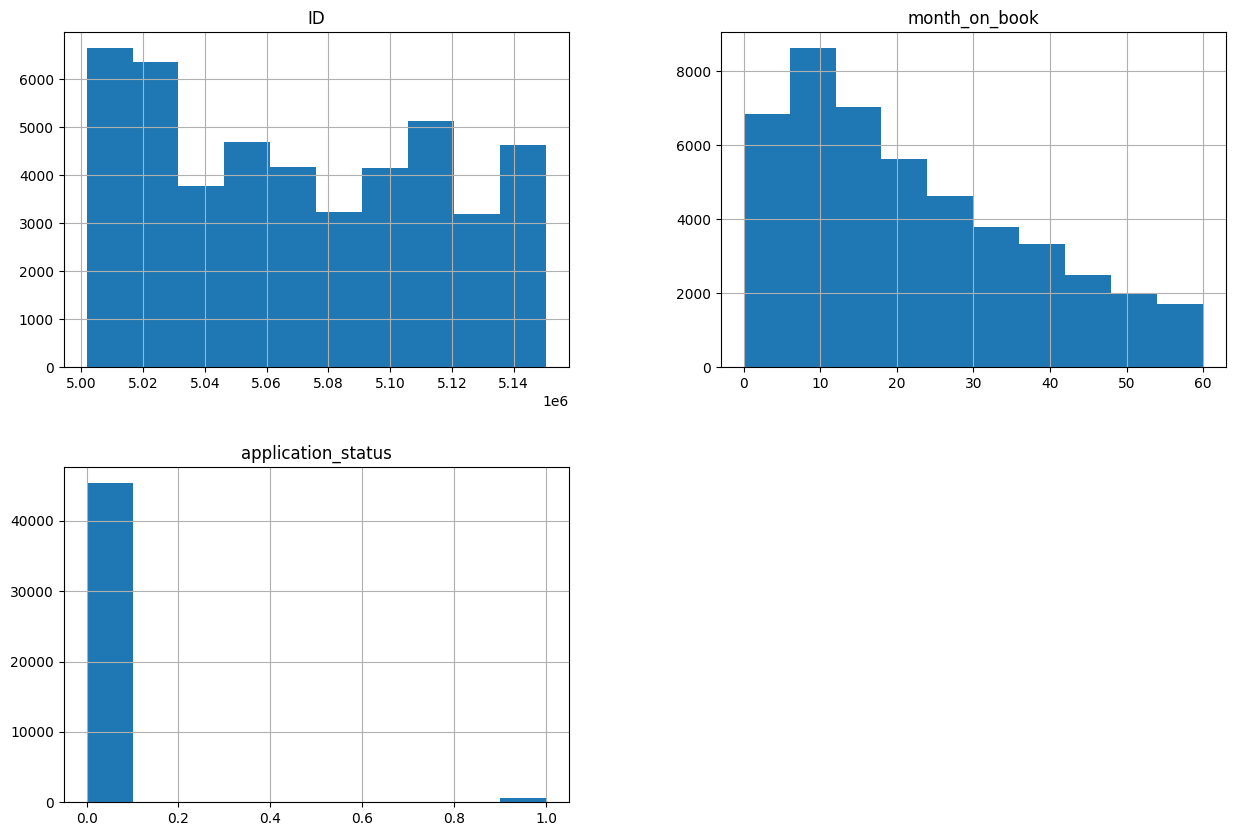

In [42]:
dt.hist(figsize=(15,10))

In [43]:
# # # Handling the missing values in  dataset----------------
# Replace the 'unknown's with NaN
cc_apps = dt.replace('unknown', np.nan)
cc_apps.to_csv(r'result3.csv')
credit_app = pd.read_csv(r'result3.csv')
# print (credit_app)
# print (credit_app.describe())
credit_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          36457 non-null  object 
 5   FLAG_OWN_CAR         36457 non-null  object 
 6   FLAG_OWN_REALTY      36457 non-null  object 
 7   CNT_CHILDREN         36457 non-null  float64
 8   AMT_INCOME_TOTAL     36457 non-null  float64
 9   NAME_INCOME_TYPE     36457 non-null  object 
 10  NAME_EDUCATION_TYPE  36457 non-null  object 
 11  NAME_FAMILY_STATUS   36457 non-null  object 
 12  NAME_HOUSING_TYPE    36457 non-null  object 
 13  DAYS_BIRTH           36457 non-null  float64
 14  DAYS_EMPLOYED        36457 non-null  float64
 15  FLAG_MOBIL           36457 non-null 

In [44]:
# #  Preprocessing the data--------
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Convert the non-numeric data into numeric--------
# Iterate over all the values of each column and extract their dtypes
for col in credit_app.columns:
    # Compare if the dtype is object
    if credit_app[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_app[col]=le.fit_transform(credit_app[col])

print(credit_app.info())
credit_app.to_csv(r'result5.csv')
credit_processing  = pd.read_csv(r'result5.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          45985 non-null  int32  
 5   FLAG_OWN_CAR         45985 non-null  int32  
 6   FLAG_OWN_REALTY      45985 non-null  int32  
 7   CNT_CHILDREN         36457 non-null  float64
 8   AMT_INCOME_TOTAL     36457 non-null  float64
 9   NAME_INCOME_TYPE     45985 non-null  int32  
 10  NAME_EDUCATION_TYPE  45985 non-null  int32  
 11  NAME_FAMILY_STATUS   45985 non-null  int32  
 12  NAME_HOUSING_TYPE    45985 non-null  int32  
 13  DAYS_BIRTH           36457 non-null  float64
 14  DAYS_EMPLOYED        36457 non-null  float64
 15  FLAG_MOBIL           36457 non-null 

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

# Load the data
credit_app = pd.read_csv(r'result3.csv')

In [46]:
# Replace 'unknown' values with NaN
credit_app.replace('unknown', np.nan, inplace=True)

# Drop unnecessary columns
credit_app = credit_app.drop(columns=["ID", "CNT_CHILDREN", "NAME_HOUSING_TYPE", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

In [47]:
# Reorder columns for clarity
column_names = ["month_on_book", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AMT_INCOME_TOTAL",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "DAYS_EMPLOYED",
                "FLAG_MOBIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "application_status"]
credit_app = credit_app.reindex(columns=column_names)

In [48]:
# Convert non-numeric data into numeric using LabelEncoder
le = LabelEncoder()
for col in credit_app.columns:
    if credit_app[col].dtype == 'object':
        credit_app[col] = le.fit_transform(credit_app[col])

# Save the preprocessed data
credit_app.to_csv(r'result5.csv')

In [49]:
 #Separate features and target
X, y = credit_app.iloc[:, :-1], credit_app.iloc[:, -1]

# Handle missing values (NaN) - You can customize this based on your preference
X.fillna(X.mean(), inplace=True)

In [50]:
# Create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

# Concatenate the resampled data with the majority class
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [51]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [52]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [54]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [55]:
print("Accuracy of logistic regression classifier:", accuracy)

Accuracy of logistic regression classifier: 0.688823918799647


In [56]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5485 3641]
 [2000 7002]]


In [57]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)
random_f.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)
print("Training Score:",random_f.score(X_train_scaled,y_train)*100,'%')

Training Score: 97.0872179621559 %


In [59]:
print("Testing Score:",random_f.score(X_test_scaled,y_test)*100,'%')

Testing Score: 97.05979699911738 %


In [60]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Accuracy of Random Forest classifier: 0.9705979699911739
Confusion Matrix for Random Forest:
[[8879  247]
 [ 286 8716]]


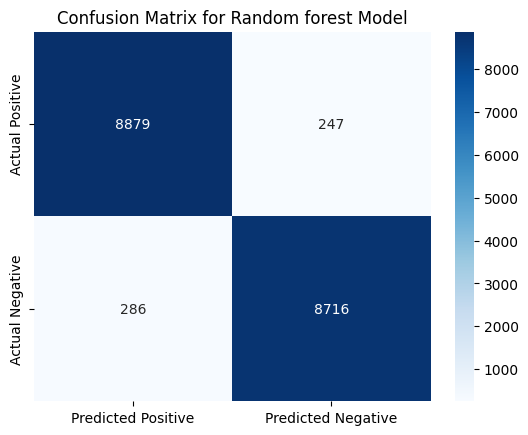

In [62]:
# Your confusion matrix
import seaborn as sns
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

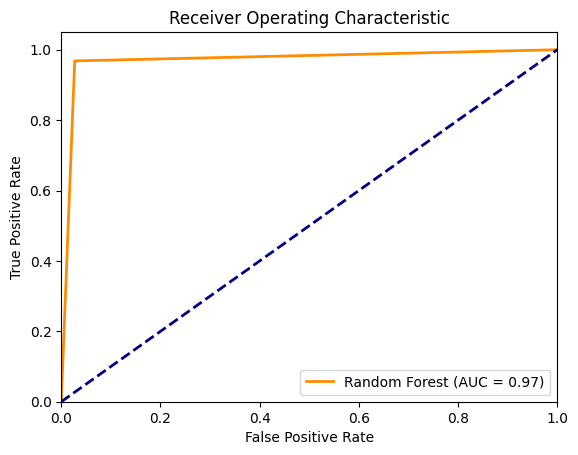

In [63]:
# Your ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Random Forest classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
#use SVC
# Import SVC from sklearn.svm
from sklearn.svm import SVC

# Instantiate SVC
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svc.predict(X_test)

In [ ]:
# Evaluate the SVC model
accuracy_svc = accuracy_score(y_test, y_pred)
conf_matrix_svc = confusion_matrix(y_test, y_pred)

print("Accuracy of SVC classifier:", accuracy_svc)
print("Confusion Matrix for SVC:")
print(conf_matrix_svc)

In [ ]:
#print the accuracy
print("Training Score:",svc.score(X_train_scaled,y_train)*100,'%')
print("Testing Score:",svc.score(X_test_scaled,y_test)*100,'%')
